### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import numpy as np

### Load the Dataset

In [2]:
data = {
    "Chest Pain": ["No", "Yes", "No", "Yes"],
    "Good Blood Circ.": ["No", "Yes", "No", "Yes"],
    "Blocked Arteries": ["No", "Yes", "No", "Yes"],
    "Weight": [125, 180, 210, 167],
    "Heart Disease": ["No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
df.replace({'Yes': 1, 'No': 0}, inplace=True)

### Pick the Target and Predictors

In [3]:
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
X

,Chest Pain,Good Blood Circ.,Blocked Arteries,Weight
0,0,0,0,125
1,1,1,1,180
2,0,0,0,210
3,1,1,1,167


In [4]:
y

0    0
1    1
2    0
3    1
Name: Heart Disease, dtype: int64

### Train the Random Forest Model

In [5]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=42)

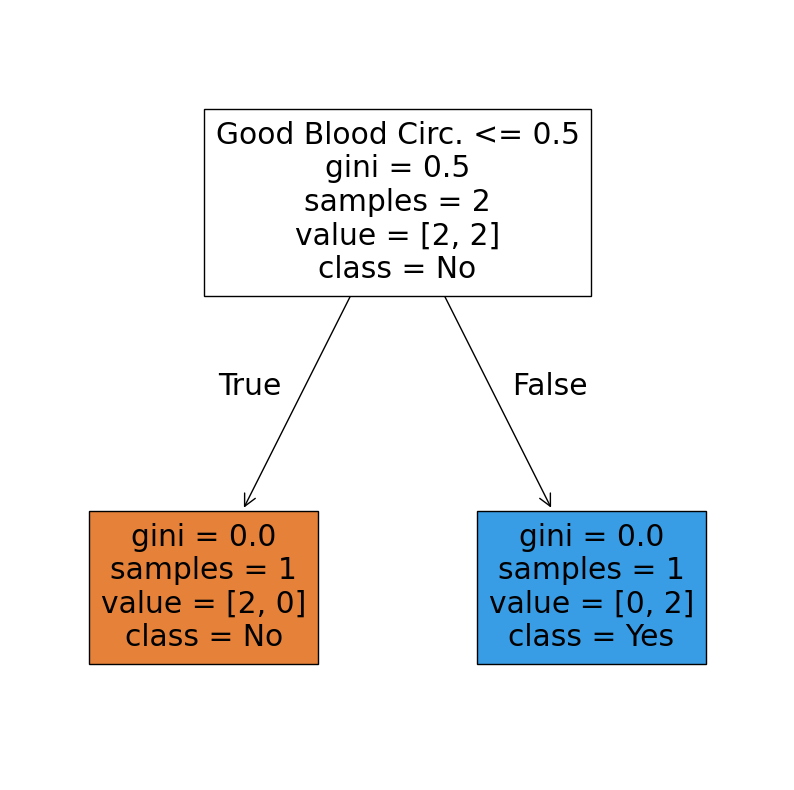

In [6]:
plt.figure(figsize=(10, 10))
plot_tree(model.estimators_[9], feature_names=list(X.columns), class_names=["No", "Yes"], filled=True) # DECISION TREE #9
plt.show()

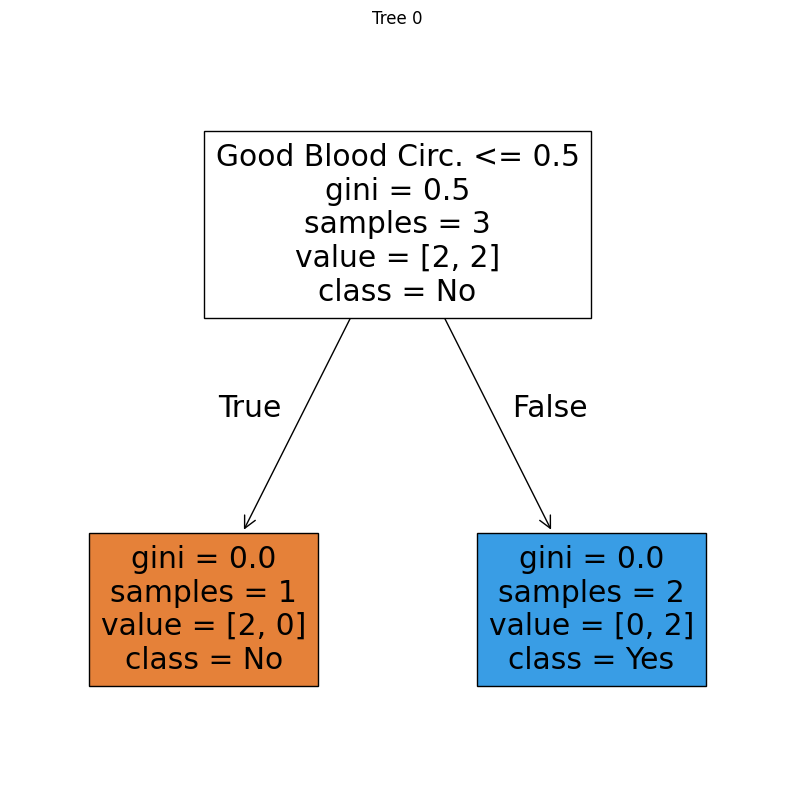

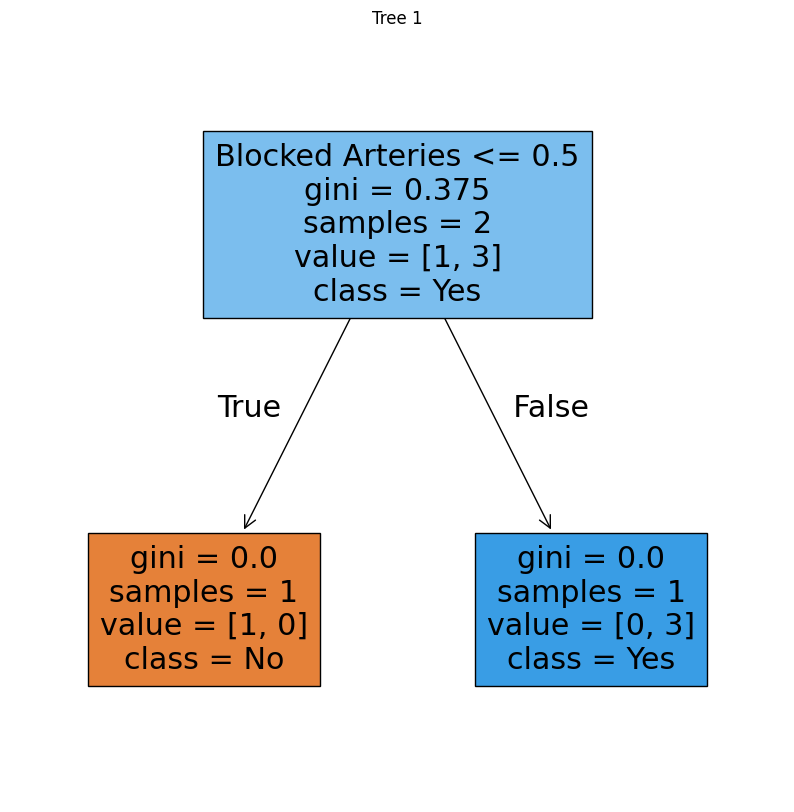

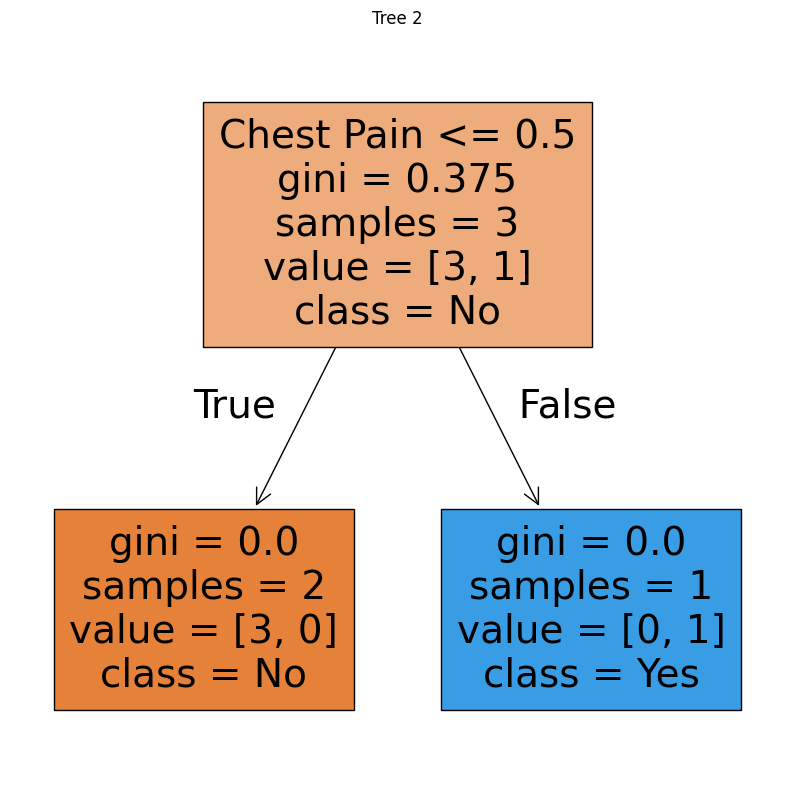

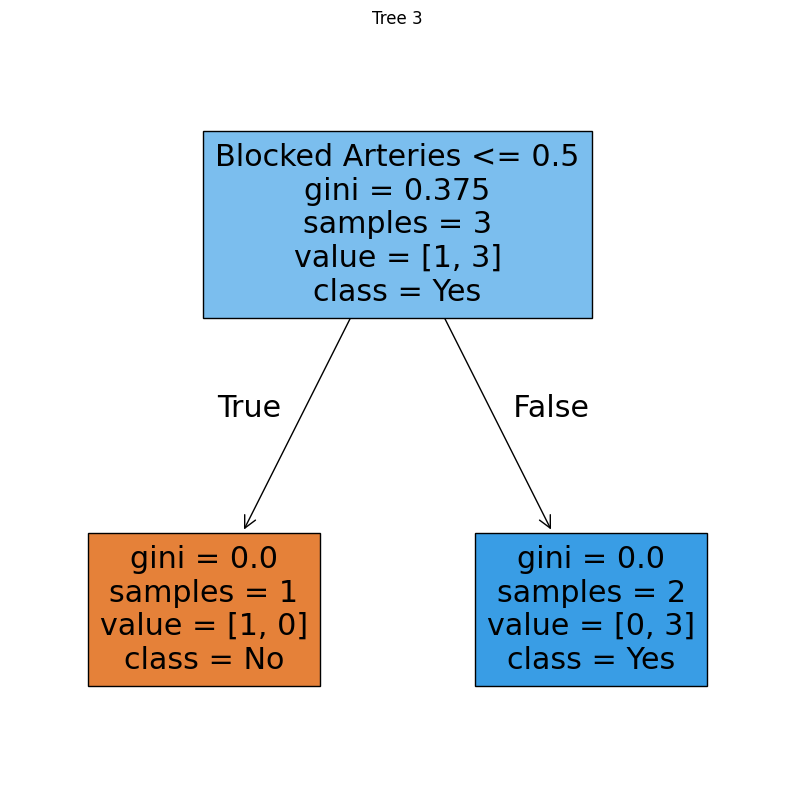

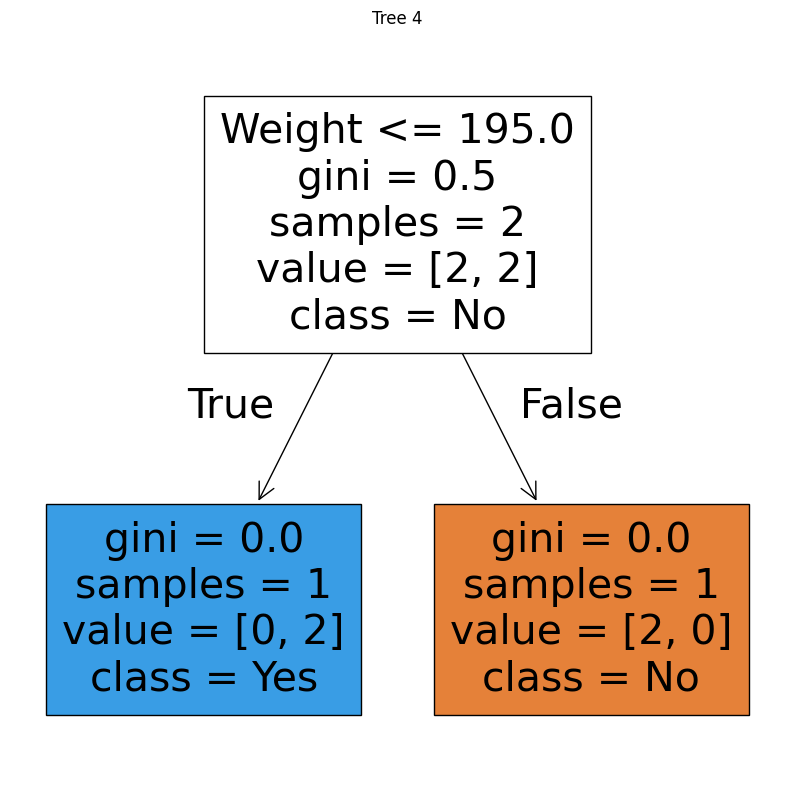

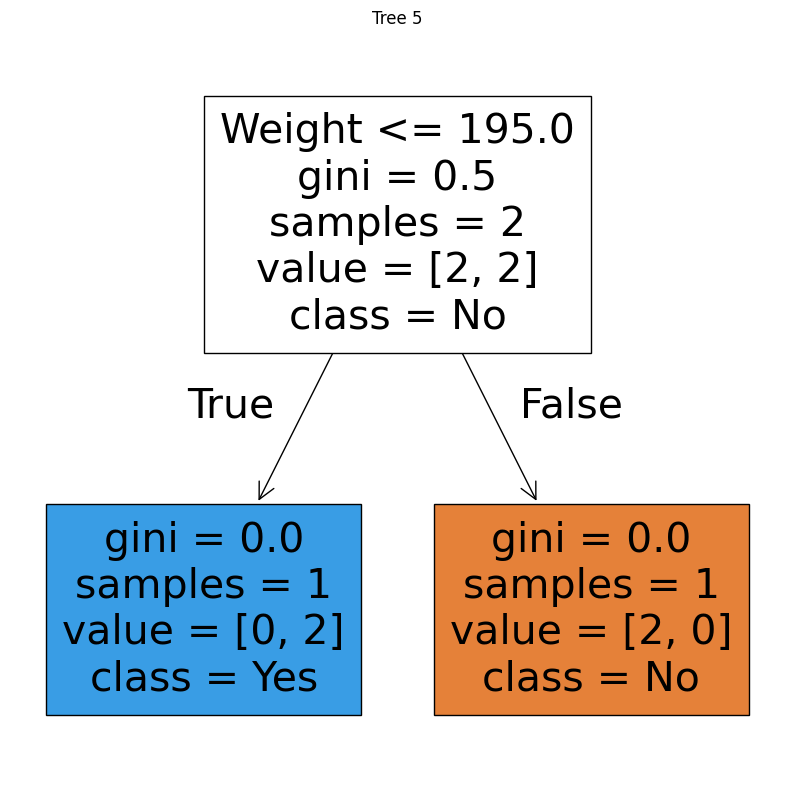

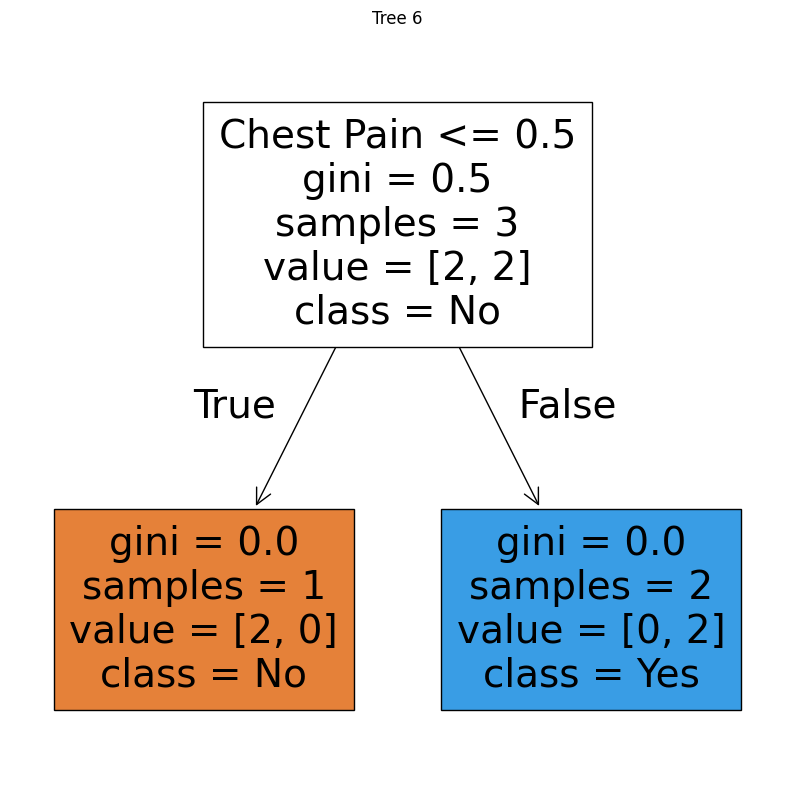

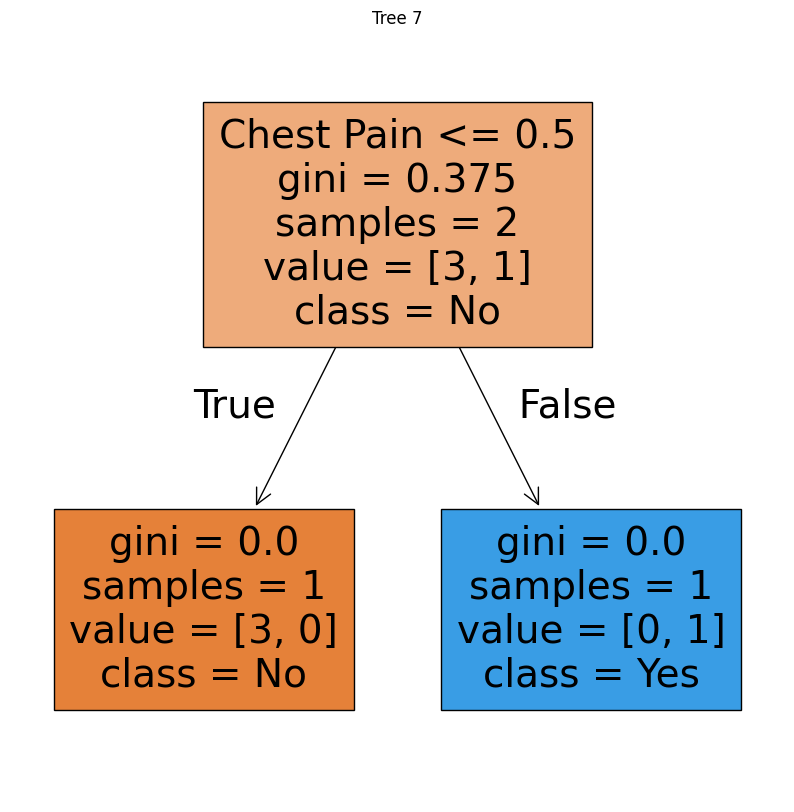

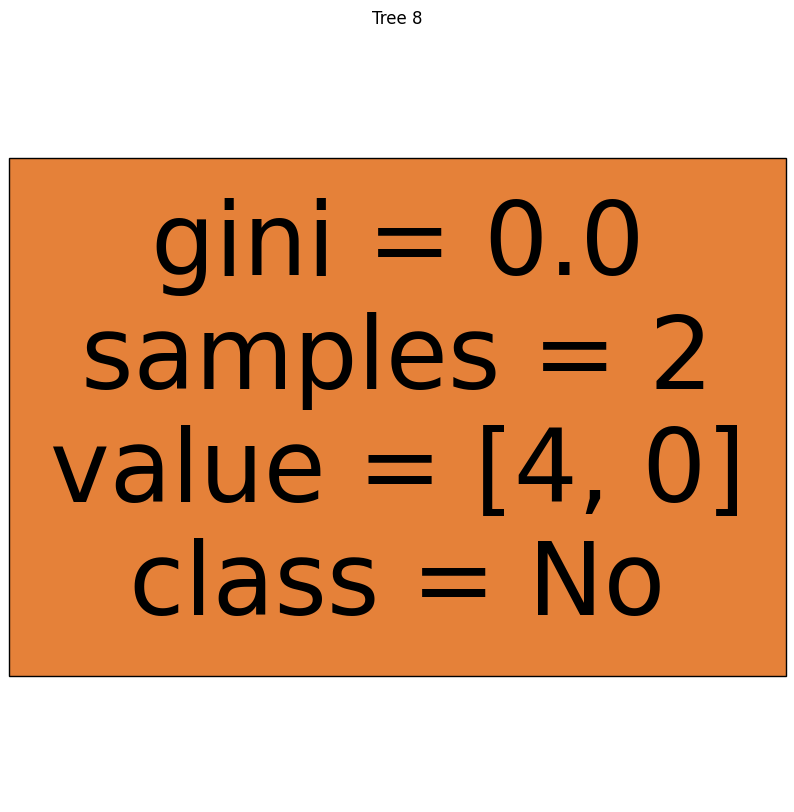

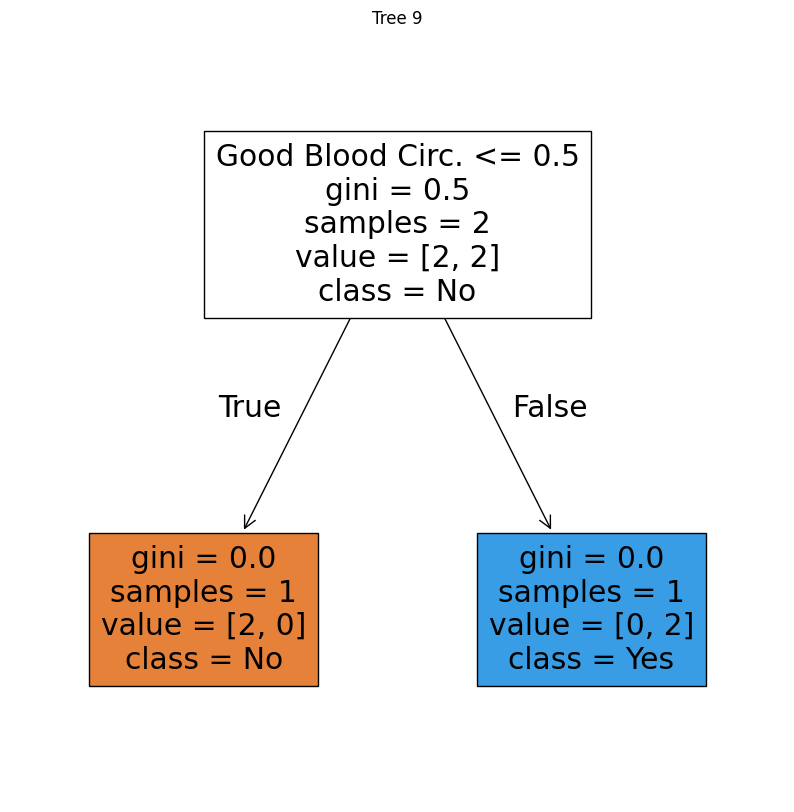

In [7]:
# TO SEE ALL TREES
for i, tree in enumerate(model.estimators_):
    plt.figure(figsize=(10, 10))
    plot_tree(tree, feature_names=list(X.columns), class_names=["No", "Yes"], filled=True)
    plt.title(f"Tree {i}")
    plt.show()

### Predictions

In [8]:
new_sample = np.array([[1, 0, 1, 190]]) #YES, NO, YES, 190

In [9]:
tree_predictions = [tree.predict(new_sample)[0] for tree in model.estimators_]

In [10]:
tree_predictions

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]

In [11]:
yes_votes = sum(tree_predictions)
no_votes = len(tree_predictions) - yes_votes

In [14]:
print(f"Total Trees: {len(tree_predictions)}")
print(f"Trees that predict 'Yes': {yes_votes}")
print(f"Trees that predict 'No': {no_votes}")

# Get the final prediction (majority vote)
final_prediction = model.predict(new_sample)[0]
print(f"Final Random Forest Prediction: {'Yes' if final_prediction == 1 else 'No'}")

Total Trees: 10
Trees that predict 'Yes': 7.0
Trees that predict 'No': 3.0
Final Random Forest Prediction: Yes


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
model.predict(new_sample)

C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Feature Importance

In [15]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

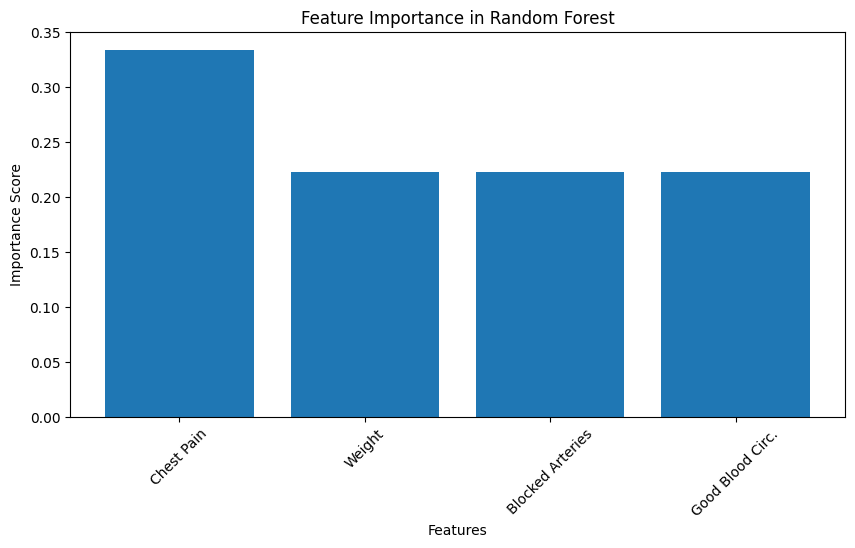

In [16]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()